Logistic Regression:
it is a supervised classification algorithm
Ex:spam email detection
y is discrete or categorical
slight modification in linear regression leads to sigmoid function which is used here looks like s shape
two types:binary classification(span or not)&multi class classification(like grade classification:distinction,1st,2nd,3rd class)
primarily used for binary but can be used for multi class using 1 vs rest method

based on probability
Sigmoid function is used to map predicted values to probability
use logit function to predict outcome:  log(odds) to make same distance of both odds of w/l
play game 10 times and u win 4 times
probability of winning p=4/10
odds of winning=4/6
odds=p/1-p
probability-->likelihood-->classification
set a threshold for classification
The term "probability" refers to the possibility of something happening. The term Likelihood refers to the process of determining the best data distribution given a specific situation in the data

[accuracy,precision,recall,f1 score,ROC curve]
model.score also does confusion matrix in classification
these all are performance evaluation metrics for classification
true positive:positive cases that were correctly predicted to be a positive class
false negative:actually postitve but algo says negative
accuracy wrt confusion matrix=correct cases/total cases

accuracy=tp+tn/(tp+tn+fn+fp)

precision:what % of cases predicted as positive are actually positive.tp/(tp+fp)

recall/sensitivity:how well does model reckognize positive cases,(tp/tp+fn)

F1 score:how exact is the model and how well does model reckognize positive cases.combines both precision and recall (2pr/(p+r)) which gives
2tp/(2tp+fn+fp)

Roc curve:reveiver operator characteristics
 fp rate vs tp rate
 (tp rate is nothing but recall).fpr=fp/(fp+tn)
 AOC ability of model to distinguish btw classes (0 worst-1 best)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [56]:
df=pd.read_csv("DS2_C5_S3_Loan_Data_Concept.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [57]:
#visualization,feature engg,split 70:30,scaling,correlation,missing values

In [58]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [59]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [60]:
for i in df.columns:
    print("-------")
    print(df[i].value_counts())

-------
1    7710
0    1868
Name: credit.policy, dtype: int64
-------
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
-------
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: int.rate, Length: 249, dtype: int64
-------
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64
-------
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: log.annual.inc, Length: 1987, dtype: int64
-------
0.00     89
10.00    19
0.60     16
15.10    13
12.00    13


In [61]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [62]:
df["purpose"]=df["purpose"].astype("category")

In [63]:
encoder=LabelEncoder()
df["purpose"]=encoder.fit_transform(df["purpose"])

In [64]:
scaler=StandardScaler()

In [65]:
#dont normalize target variable

In [66]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [67]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [68]:
x

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,0.492222,0.033176,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003
1,0.492222,-0.559665,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003
2,0.492222,0.033176,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003
3,0.492222,0.033176,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003
4,0.492222,-0.559665,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,-2.031603,-1.152506,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.299730,-0.237003
9574,-2.031603,-1.152506,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.299730,-0.237003
9575,-2.031603,0.033176,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.299730,-0.237003
9576,-2.031603,1.218858,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.299730,-0.237003


In [70]:
df_scaled=pd.concat([x,y],axis=1)

In [71]:
df_scaled

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.492222,0.033176,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0
1,0.492222,-0.559665,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0
2,0.492222,0.033176,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0
3,0.492222,0.033176,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0
4,0.492222,-0.559665,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,-2.031603,-1.152506,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.299730,-0.237003,1
9574,-2.031603,-1.152506,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,1
9575,-2.031603,0.033176,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.299730,-0.237003,1
9576,-2.031603,1.218858,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,1


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

<AxesSubplot:>

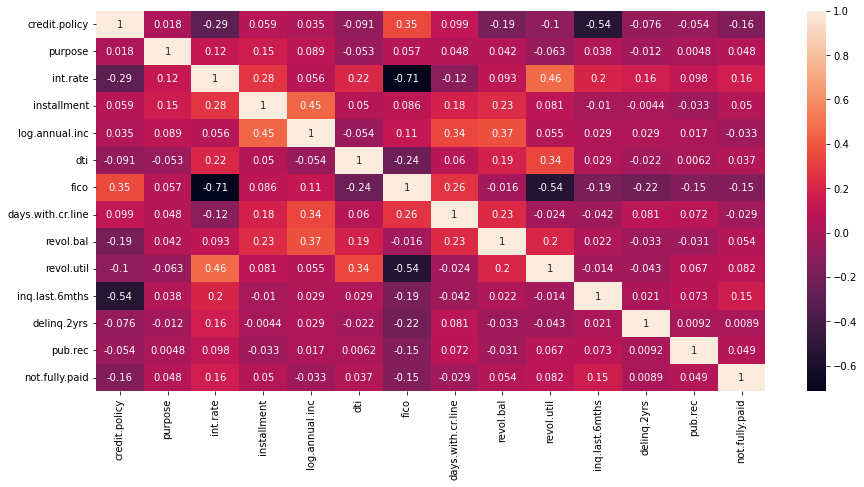

In [86]:
plt.figure(figsize=(15,7))
c=df.corr()
sb.heatmap(c,annot=True)

In [75]:
x_train.shape

(6704, 13)

In [76]:
x_test.shape

(2874, 13)

In [85]:
y_train.shape

(6704,)

In [79]:
model=LogisticRegression().fit(x_train,y_train)

In [83]:
#this is called as Accuracy in logistic regression
#train accuarcy-how well model learnt
#test accuracy-how well model perfromed in test
#this is training accuracy/model accuracy
model.score(x_train,y_train)

0.8427804295942721

In [88]:
#prediction
y_pred=model.predict(x_test)

In [91]:
#slope
model.coef_[0]

array([-0.14812455,  0.05253506,  0.101323  ,  0.22936704, -0.21900837,
       -0.05821457, -0.29645707,  0.01546059,  0.11805092,  0.00997231,
        0.18374913, -0.04527876,  0.03140637])

In [92]:
#intercept
model.intercept_

array([-1.79748385])

In [93]:
#test accuracy
model.score(x_test,y_test)

0.8319415448851775

In [99]:
confusion_matrix(y_test,y_pred)

array([[2388,    7],
       [ 476,    3]], dtype=int64)

In [96]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [97]:
tn,fp,fn,tp

(2388, 7, 476, 3)

In [100]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [104]:
recall_score(y_test,y_pred)

0.006263048016701462

In [105]:
f1_score(y_test,y_pred)

0.012269938650306749

In [106]:
accuracy_score(y_test,y_pred)

0.8319415448851775

In [107]:
precision_score(y_test,y_pred)

0.3

In [ ]:
#ROC AOC

In [108]:
from sklearn.metrics import roc_auc_score

In [111]:
#probability values of predicted y
model.predict_proba(x_test)[:,1]

array([0.07264846, 0.07000323, 0.10126092, ..., 0.11881347, 0.14187478,
       0.22158275])

In [109]:
roc=roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
roc

0.680221059008634

In [115]:
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.680


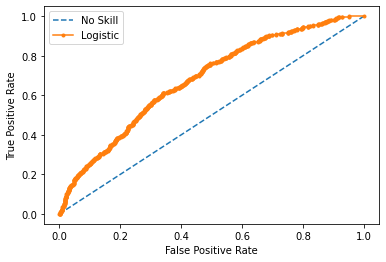

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#ns-no skill. lr-logistic regression
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves for diff thresholds
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()